In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature
from skimage.metrics import structural_similarity as ssim
import os



The shape of the colored image is: (549, 1280, 3)
[[[149 151 138]
  [105 107  93]
  [126 130 115]
  ...
  [150 141 126]
  [142 134 121]
  [144 136 123]]

 [[143 145 132]
  [132 134 121]
  [133 135 121]
  ...
  [151 142 127]
  [143 133 121]
  [142 134 121]]

 [[137 137 127]
  [156 158 145]
  [137 139 125]
  ...
  [156 147 132]
  [146 136 124]
  [143 133 121]]

 ...

 [[169 162 152]
  [141 135 123]
  [129 121 110]
  ...
  [149 135 126]
  [155 138 130]
  [158 139 132]]

 [[158 151 141]
  [171 163 152]
  [150 140 130]
  ...
  [150 136 127]
  [157 140 132]
  [164 145 138]]

 [[170 161 152]
  [186 178 167]
  [164 154 144]
  ...
  [147 133 124]
  [157 140 132]
  [170 151 144]]]


C:\Users\nishi\AppData\Local\Temp\ipykernel_64424\2549998892.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(taj_image_color)


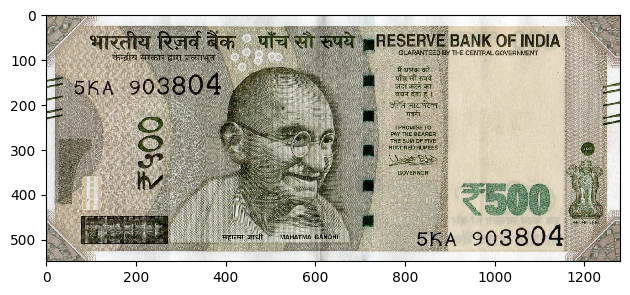

In [2]:
from  skimage.io import imread 
from  skimage.io import imshow
taj_image_color = imread('fake.jpg', as_gray=False)
print("The shape of the colored image is:",taj_image_color.shape)
print(taj_image_color)
imshow(taj_image_color)

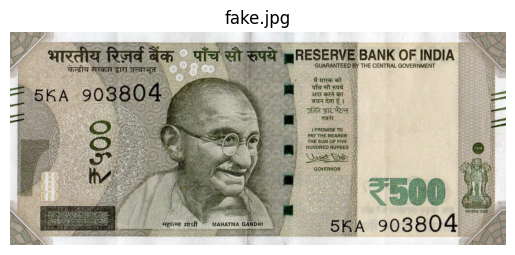

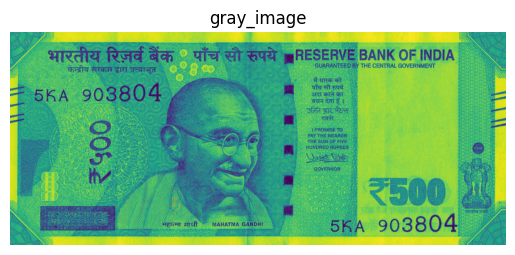

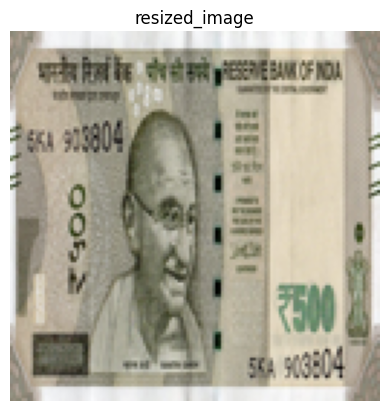

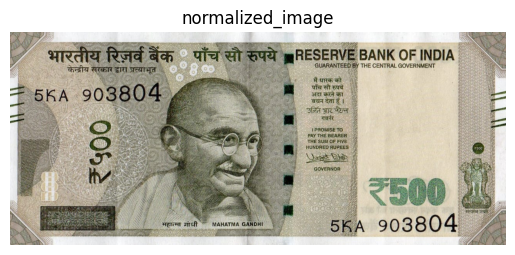

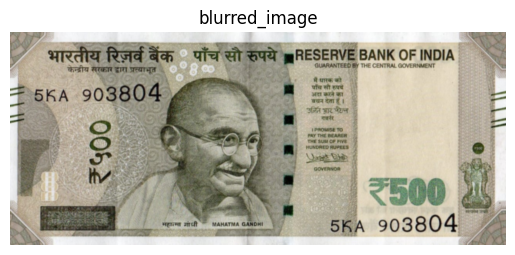

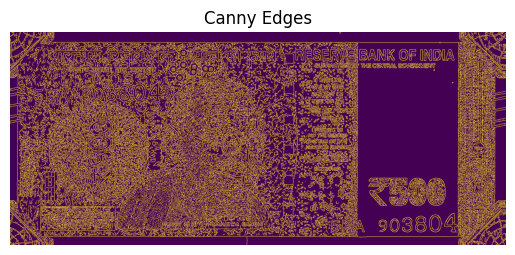

Image preprocessing completed and images saved.


In [3]:
def display_image(image, title='taj_image_color'):
    plt.imshow(image, cmap='gray' if len(taj_image_color.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image using PIL
image_path = 'fake.jpg'  # Change this to your image path
image = Image.open(image_path)

# Display the original image
display_image(image, title='fake.jpg')


# Convert the image to grayscale
gray_image = image.convert('L')
display_image(gray_image, title='gray_image')

# Resize the image
resized_image = image.resize((128, 128))  # Resize to 128x128 pixels
display_image(resized_image, title='resized_image')

# Convert to NumPy array for further processing
image_array = np.array(image)
normalized_image = image_array / 255.0  # Normalize pixel values to [0, 1]
display_image(normalized_image, title='normalized_image')

# Apply Gaussian Blur using OpenCV
blurred_image = cv2.GaussianBlur(image_array, (5, 5), 0)
display_image(blurred_image, title='blurred_image')

# Edge detection using Canny
edges = cv2.Canny(image_array, 100, 200)
display_image(edges, title='Canny Edges')

# Save the processed images
gray_image.save('gray_image.jpg')
resized_image.save('resized_image.jpg')
cv2.imwrite('blurred_image.jpg', blurred_image)
cv2.imwrite('edges_image.jpg', edges)

print("Image preprocessing completed and images saved.")

Image loaded successfully.
Number of RBI seals detected: 0
Image loaded successfully.
Total contours found: 441
Number of latent images detected: 18
Image loaded successfully.
Total contours found: 441
Number of denominational numbers detected: 18
Detected Security Threads: 45
Detected Bleed Lines: 1


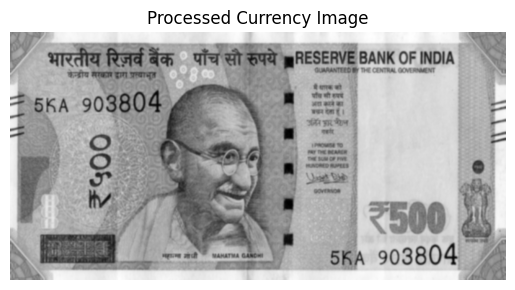

In [4]:

import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import os

def preprocess_image(image_path):
    image = cv2.imread('fake.jpg')
    resized_image = cv2.resize(image, (800, 400))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    return blurred_image

def detect_security_thread(image):
    edges = cv2.Canny(image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    security_thread_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:  # Filter small contours
            security_thread_count += 1
            
    return security_thread_count

# Function to count bleed lines
def count_bleed_lines(image):
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bleed_line_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 50:  # Filter small contours
            bleed_line_count += 1
            
    return bleed_line_count

    def detect_rbi_seal(image):
         gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Convert the image to grayscale
   
    
    # Apply Gaussian blur to reduce noise and improve contour detection
 
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    rbi_seal_count = 0
    
    for cnt in contours:
        # Filter contours based on area and shape characteristics
        if cv2.contourArea(cnt) > 500:  # Adjust the area threshold as needed
            # Optionally, you can add more checks for the shape of the contour
            # For example, you might want to check if the contour is circular
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            
            # Check if the contour has a certain number of vertices (e.g., circular shape)
            if len(approx) >= 8:  # Adjust this based on the expected shape of the RBI seal
                rbi_seal_count += 1

                  # Print the results
    print(f'Total contours found: {len(contours)}')

                
    return rbi_seal_count
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Call the function and handle potential errors
if image is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    print("Image loaded successfully.")
rbi_seal_count = 0

# Call the function and handle potential errors

try:
    print(f'Number of RBI seals detected: {rbi_seal_count}')
except Exception as e:
    print(f"Error printing the number of RBI seals: {e}")

  

def detect_latent_image(image):
    if image is None:
        print("Error: Image not found or unable to load.")
        return 0  # Return 0 if the image is not loaded

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    latent_image_count = 0
    
    for cnt in contours:
        # Filter contours based on area and shape characteristics
        if cv2.contourArea(cnt) > 500:  # Adjust the area threshold as needed
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            
            # Check if the contour has a certain number of vertices (e.g., circular or specific shape)
            if len(approx) >= 5:  # Adjust this based on the expected shape of the latent image
                latent_image_count += 1
                
    # Print the results
    print(f'Total contours found: {len(contours)}')
    
    return latent_image_count

# Example usage
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    print("Image loaded successfully.")

# Initialize latent_image_count
latent_image_count = 0

# Call the function and handle potential errors
try:
    latent_image_count = detect_latent_image(image)
    print(f'Number of latent images detected: {latent_image_count}')
except Exception as e:
    print(f"Error during detection: {e}")

    
def detect_denominational_number(image):
    if image is None:
        print("Error: Image not found or unable to load.")
        return 0  # Return 0 if the image is not loaded

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    denominational_number_count = 0
    
    for cnt in contours:
        # Filter contours based on area and shape characteristics
        if cv2.contourArea(cnt) > 500:  # Adjust the area threshold as needed
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            
            # Check if the contour has a certain number of vertices (e.g., rectangular shape)
            if len(approx) >= 4:  # Adjust this based on the expected shape of the denominational number
                denominational_number_count += 1
                
    # Print the results
    print(f'Total contours found: {len(contours)}')
    
    return denominational_number_count

# Example usage
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    print("Image loaded successfully.")

# Initialize denominational_number_count
denominational_number_count = 0

# Call the function and handle potential errors
try:
    denominational_number_count = detect_denominational_number(image)
    print(f'Number of denominational numbers detected: {denominational_number_count}')
except Exception as e:
    print(f"Error during detection: {e}")


# Function to compare two images using SSIM
def compare_images(imageA, imageB):
    score, _ = ssim(imageA, imageB, full=True)
    return score

# Main function
def main():
    # Load and preprocess the currency image
    currency_image_path = 'fake.jpg'  # Replace with your image path
    currency_image = preprocess_image(currency_image_path)

    # Detect security thread
    security_thread_count = detect_security_thread(currency_image)
    print(f"Detected Security Threads: {security_thread_count}")

    # Count bleed lines
    bleed_line_count = count_bleed_lines(currency_image)
    print(f"Detected Bleed Lines: {bleed_line_count}")
    

    # Display the processed image
    plt.imshow(currency_image, cmap='gray')
    plt.title('Processed Currency Image')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

    main()

   

    
# Evaluate the model


In [5]:
def detect_watermark(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    watermark_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # Adjust the area threshold as needed
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            if len(approx) >= 8:  # Assuming watermarks are circular
                watermark_count += 1
                
    return watermark_count

def detect_security_thread(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    security_thread_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:  # Filter small contours
            security_thread_count += 1
            
    return security_thread_count

def detect_fake_currency(image):
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    # Check for watermarks
    watermark_count = detect_watermark(image)
    print(f'Watermarks detected: {watermark_count}')

    # Check for security threads
    security_thread_count = detect_security_thread(image)
    print(f'Security threads detected: {security_thread_count}')

    # Basic logic to determine if the currency is likely fake
    if watermark_count == 0 and security_thread_count == 0:
        print("The currency is likely fake.")
    else:
        print("The currency appears to be real.")

# Example usag
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    print("Image loaded successfully.")
    detect_fake_currency(image)
def detect_latent_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    latent_image_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # Adjust the area threshold as needed
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            if len(approx) >= 5:  # Adjust based on expected shape of latent images
                latent_image_count += 1
                
    return latent_image_count

def analyze_currency(image):
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    # Detect latent images
    latent_image_count = detect_latent_image(image)

    # Print results
    print(f'Latent images detected: {latent_image_count}')

    # Basic logic to determine if the currency is likely fake
    if latent_image_count == 0:
        print("The currency is likely fake.")
    else:
        print("The currency appears to be real.")

# Example usage
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    analyze_currency(image)


def template_matching(image, template):
    # Convert both images to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Perform template matching
    result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8  # Set a threshold for detection
    locations = np.where(result >= threshold)

    return len(locations[0])  # Return the number of matches found

# Example usage
template_path = 'fake.jpg'  # Replace with your template path
template = cv2.imread(template_path)
image_path = 'fake.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None or template is None:
    print("Error: Unable to load image or template. Please check the file paths.")
else:
    matches = template_matching(image, template)
    if matches < 0:
        print(f'RBI seal detected: {matches} match(es) found.')
    else:
        print("The RBI currency is likely to be fake because zero matches found .") 
    
    print("CURRENCY IS FAKE")
   

Image loaded successfully.
Watermarks detected: 14
Security threads detected: 105
The currency appears to be real.
Latent images detected: 18
The currency appears to be real.
The RBI currency is likely to be fake because zero matches found .
CURRENCY IS FAKE
